# Traditional Credit Model


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import Aid_traditional as aid
import ML_Model as ml
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from credit_model_binary import calculate_traditional_credit_score_binary

In [ ]:
data = aid.clean_data_trad('data_traditional.csv')
df = pd.read_csv('credit_score.csv')

df['credit_utilization_ratio']
avg_utilization_ratio = df.groupby('customer_id')['credit_utilization_ratio'].mean().round().astype(int).reset_index()['credit_utilization_ratio']/100
data['avg_utilization_ratio'] = avg_utilization_ratio
avg_inhand_income = df.groupby('customer_id')['monthly_inhand_salary'].mean().round().astype(int).reset_index()['monthly_inhand_salary']
data['avg_inhand_income'] = avg_inhand_income
data['avg_credit_score'] = data['avg_credit_score'].replace(2, 1)
data

,customer_id,avg_credit_history,avg_delay,avg_num_inquires,avg_outstanding_debt,avg_credit_mix,avg_credit_score,avg_utilization_ratio,avg_inhand_income
0,CUS_0x1000,46,62,11,1563,0,0,0.33,2706
1,CUS_0x1009,128,7,3,203,1,1,0.30,4250
2,CUS_0x100b,67,14,2,1030,2,0,0.35,9550
3,CUS_0x1011,66,27,7,473,1,1,0.28,5209
4,CUS_0x1013,75,12,3,1234,2,1,0.32,7962
...,...,...,...,...,...,...,...,...,...
12082,CUS_0xff3,72,12,4,1229,2,1,0.33,1176
12083,CUS_0xff4,78,16,5,758,1,1,0.33,2416
12084,CUS_0xff6,104,0,2,338,2,1,0.33,9727
12085,CUS_0xffc,56,45,12,1300,0,0,0.35,5218


In [5]:
resultado = calculate_traditional_credit_score_binary(data)
resultado

,customer_id,avg_credit_history,avg_delay,avg_num_inquires,avg_outstanding_debt,avg_credit_mix,avg_credit_score,avg_utilization_ratio,avg_inhand_income,history_score,delay_score,inquiries_score,debt_score,mix_score,total_score,fico_score,credit_category
0,CUS_0x1000,46,62,11,1563,0,0,0.33,2706,60,10,10,50,30,27.50,451.250,0
1,CUS_0x1009,128,7,3,203,1,1,0.30,4250,100,70,70,90,65,76.50,720.750,1
2,CUS_0x100b,67,14,2,1030,2,0,0.35,9550,80,70,90,75,100,81.25,746.875,1
3,CUS_0x1011,66,27,7,473,1,1,0.28,5209,80,40,40,90,65,58.50,621.750,1
4,CUS_0x1013,75,12,3,1234,2,1,0.32,7962,80,70,70,75,100,78.25,730.375,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12082,CUS_0xff3,72,12,4,1229,2,1,0.33,1176,80,70,70,75,100,78.25,730.375,1
12083,CUS_0xff4,78,16,5,758,1,1,0.33,2416,80,40,70,75,65,60.75,634.125,1
12084,CUS_0xff6,104,0,2,338,2,1,0.33,9727,100,100,90,90,100,97.00,833.500,1
12085,CUS_0xffc,56,45,12,1300,0,0,0.35,5218,80,10,10,75,30,34.25,488.375,0


<Axes: >

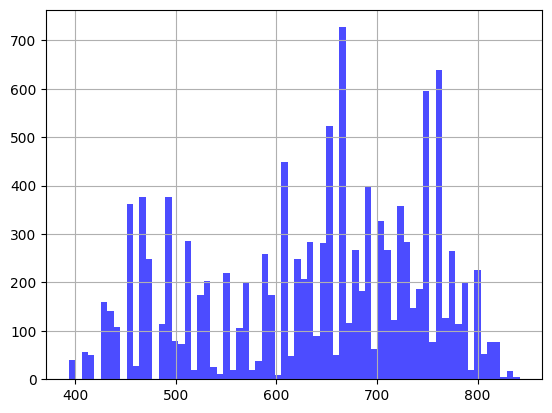

In [6]:
resultado['fico_score'].hist(bins=70, color='blue', alpha=0.7)

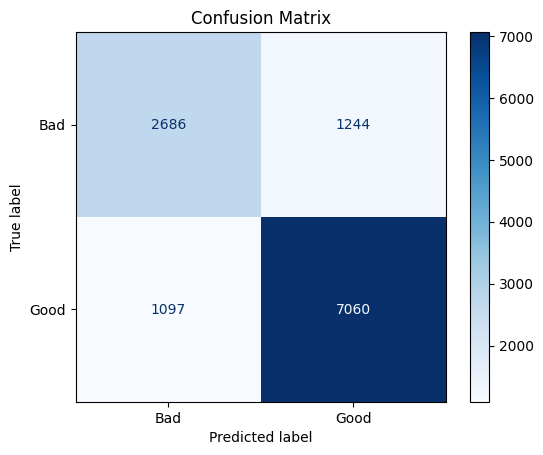

Accuracy: 0.8063

Macro-averaged metrics:
Precision: 0.7801
Recall: 0.7745
F1-score: 0.7771

Per-class metrics:

Bad Credit Score:
  Precision: 0.7100
  Recall: 0.6835
  F1-score: 0.6965

Good Credit Score:
  Precision: 0.8502
  Recall: 0.8655
  F1-score: 0.8578

Detailed Classification Report:
              precision    recall  f1-score   support

         Bad       0.71      0.68      0.70      3930
        Good       0.85      0.87      0.86      8157

    accuracy                           0.81     12087
   macro avg       0.78      0.77      0.78     12087
weighted avg       0.80      0.81      0.81     12087



C:\Users\FrAl098\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\FrAl098\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\FrAl098\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

y_true = resultado['avg_credit_score']
y_pred = resultado['credit_category']

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bad', 'Good'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Calculate basic metrics
accuracy = accuracy_score(y_true, y_pred)
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

# Calculate metrics for each class
precision_per_class = precision_score(y_true, y_pred, average=None, labels=[0, 1, 2])
recall_per_class = recall_score(y_true, y_pred, average=None, labels=[0, 1, 2])
f1_per_class = f1_score(y_true, y_pred, average=None, labels=[0, 1, 2])

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nMacro-averaged metrics:")
print(f"Precision: {precision_macro:.4f}")
print(f"Recall: {recall_macro:.4f}")
print(f"F1-score: {f1_macro:.4f}")

print("\nPer-class metrics:")
class_names = ['Bad', 'Good']
for i, class_name in enumerate(class_names):
    print(f"\n{class_name} Credit Score:")
    print(f"  Precision: {precision_per_class[i]:.4f}")
    print(f"  Recall: {recall_per_class[i]:.4f}")
    print(f"  F1-score: {f1_per_class[i]:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

In [9]:
from Aid_ML import clean_data_ml

In [10]:
data_1 = clean_data_ml('credit_score.csv')  # Ensure clean_data is properly imported and callable
data_1

,aver_annual_income,avg_monthly_inhand_salary,avg_total_emi_per_month,avg_num_bank_accounts,avg_num_credit_card,avg_num_loans,avg_monthly_balance,avg_credit_history,avg_delay,avg_num_inquires,avg_outstanding_debt,avg_credit_mix,avg_credit_score
0,30626,2706,43,6,5,2,335,46,62,11,1563,0,0
1,52313,4250,108,6,5,4,429,128,7,3,203,1,1
2,113781,9550,0,1,4,0,781,67,14,2,1030,2,0
3,58918,5209,123,3,3,3,333,66,27,7,473,1,1
4,98621,7962,228,3,3,3,473,75,12,3,1234,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12082,17033,1176,33,0,6,3,272,72,12,4,1229,2,1
12083,25546,2416,101,8,7,5,260,78,16,5,758,1,1
12084,117640,9727,127,5,6,2,667,104,0,2,338,2,1
12085,60877,5218,273,6,8,8,340,56,45,12,1300,0,0


Distribución de clases en los datos de entrenamiento:
avg_credit_score
1    0.675414
0    0.324586
Name: proportion, dtype: float64

--- Entrenando modelo XGBoost básico ---
Precisión del modelo básico: 0.82

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1184
           1       0.86      0.88      0.87      2443

    accuracy                           0.82      3627
   macro avg       0.80      0.79      0.80      3627
weighted avg       0.82      0.82      0.82      3627



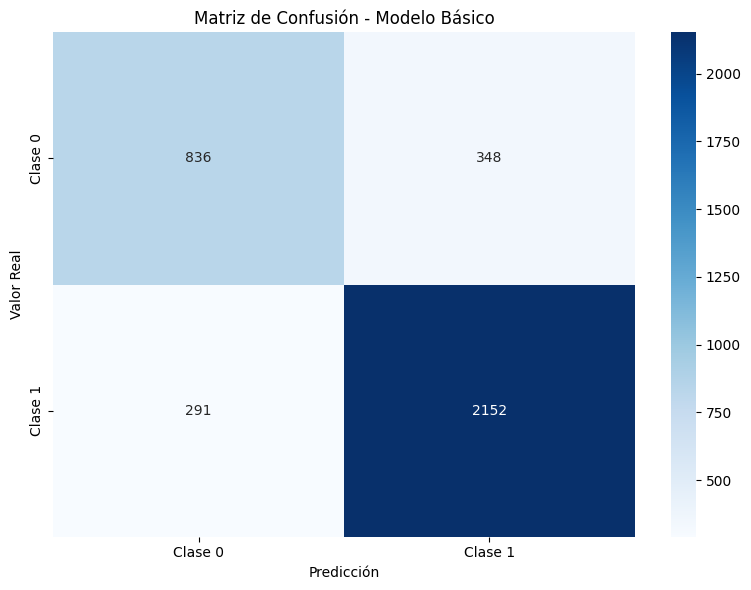


--- Optimizando hiperparámetros ---
Fitting 3 folds for each of 72 candidates, totalling 216 fits

Mejores parámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Mejor puntuación CV: 0.83

Precisión del modelo optimizado: 0.83

Informe de clasificación del modelo optimizado:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1184
           1       0.87      0.88      0.87      2443

    accuracy                           0.83      3627
   macro avg       0.81      0.80      0.81      3627
weighted avg       0.83      0.83      0.83      3627



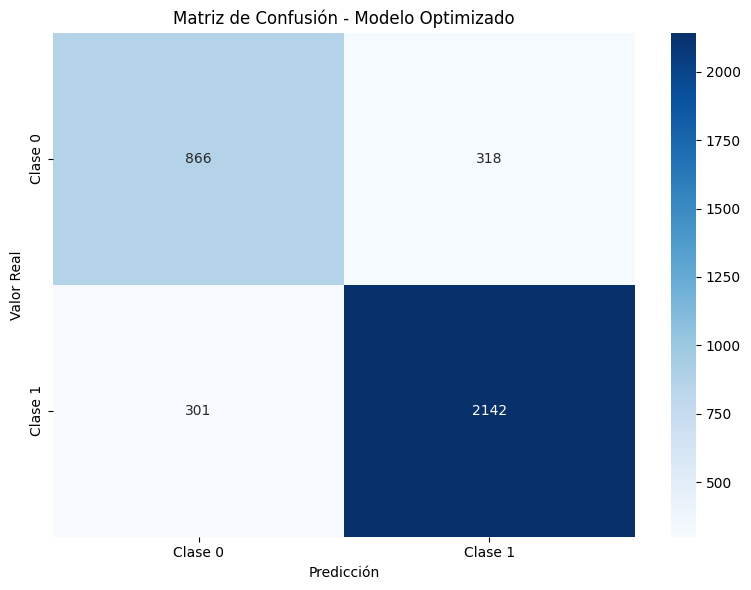

<Figure size 1200x600 with 0 Axes>

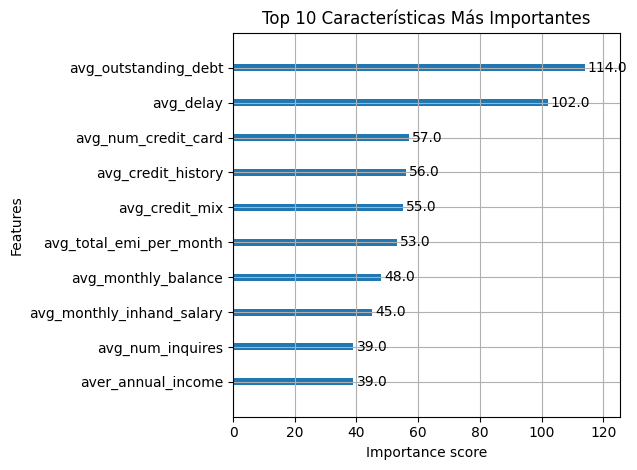


Importancia de características (peso):
avg_outstanding_debt: 114.0
avg_delay: 102.0
avg_num_credit_card: 57.0
avg_credit_history: 56.0
avg_credit_mix: 55.0
avg_total_emi_per_month: 53.0
avg_monthly_balance: 48.0
avg_monthly_inhand_salary: 45.0
aver_annual_income: 39.0
avg_num_inquires: 39.0
avg_num_bank_accounts: 29.0
avg_num_loans: 13.0

Modelo guardado como 'xgboost_credit_score_model.json'

Accuracy del modelo: 0.8293

Características más importantes:
- avg_outstanding_debt: 114.0
- avg_delay: 102.0
- avg_num_credit_card: 57.0
- avg_credit_history: 56.0
- avg_credit_mix: 55.0


In [11]:
results = ml.train_xgboost_credit_score_model(
        data=data_1,
        target_column='avg_credit_score',
        save_model_path='xgboost_credit_score_model.json'
    )
    
# Acceder a los resultados
best_model = results['model']
accuracy = results['accuracy']
feature_importance = results['feature_importance']

print(f"\nAccuracy del modelo: {accuracy:.4f}")
print("\nCaracterísticas más importantes:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"- {feature}: {importance}")
